## Carregando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# 1. Carregando os dados

In [53]:
# Carregando o dataset
cardio = pd.read_csv('cardio_train.csv', sep=';')

In [54]:
cardio.head() # Visualizando as primeiras linhas do dataframe

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

Data description There are 3 types of input features:

Objective: factual information; Examination: results of medical examination; Subjective: information given by the patient. Features:

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

In [55]:
cardio_eda = cardio.copy(deep = False) # Criando uma cópida do dataframe

# 2. Tratamento dos dados

In [56]:
# Modificando as variáveis categóricas

cardio_eda['gender'] = cardio['gender'].map({1: 'female', 2: 'male'})
cardio_eda['cholesterol'] = cardio['cholesterol'].map({1: 'normal', 2: 'above normal', 3: 'well above normal'})
cardio_eda['gluc'] = cardio['gluc'].map({1: 'normal', 2: 'above normal', 3: 'well above normal'})
cardio_eda['smoke'] = cardio['smoke'].map({0: 'no', 1: 'yes'})
cardio_eda['alco'] = cardio['alco'].map({0: 'no', 1: 'yes'})
cardio_eda['active'] = cardio['active'].map({0: 'no', 1: 'yes'})
cardio_eda['cardio'] = cardio['cardio'].map({0: 'no', 1: 'yes'})

In [57]:
cardio_eda.head() # Esse dataframe será utilizado para análise exploratória

id    age  gender  height  weight  ap_hi  ap_lo        cholesterol    gluc  \
0   0  18393    male     168    62.0    110     80             normal  normal   
1   1  20228  female     156    85.0    140     90  well above normal  normal   
2   2  18857  female     165    64.0    130     70  well above normal  normal   
3   3  17623    male     169    82.0    150    100             normal  normal   
4   4  17474  female     156    56.0    100     60             normal  normal   

  smoke alco active cardio  
0    no   no    yes     no  
1    no   no    yes    yes  
2    no   no     no    yes  
3    no   no    yes    yes  
4    no   no     no     no

* Modificando algumas variáveis e criando novas

In [58]:
# Modificando a variável 'age'. Dividindo os valores por 365 para retornar a idade em anos.
cardio_eda['age'] = round(cardio_eda['age'] / 365)

# Modificando a variável 'height'. Dividindo os valores por 100 para retornar a altura em metros
cardio_eda['height'] = cardio_eda['height'] / 100

In [59]:
# Criando a variavel 'imc' para calcular o indice de massa corporal
cardio_eda['imc'] = cardio_eda['weight'] / cardio_eda['height'] **2

In [60]:
# Classificando o imc
for i in range(len(cardio_eda)):
  if cardio_eda.loc[i, 'imc'] < 16.00:
    cardio_eda.loc[i, 'classificacao_imc'] = 'magreza grau 3'
  elif (cardio_eda.loc[i, 'imc'] >= 16.00) and (cardio_eda.loc[i, 'imc'] <= 16.99):
    cardio_eda.loc[i, 'classificacao_imc'] = 'magreza grau 2'
  elif (cardio_eda.loc[i, 'imc'] >= 17.00) and (cardio_eda.loc[i, 'imc'] <= 18.40):
    cardio_eda.loc[i, 'classificacao_imc'] = 'magreza grau 1'
  elif (cardio_eda.loc[i, 'imc'] >= 18.50) and (cardio_eda.loc[i, 'imc'] <= 24.99):
    cardio_eda.loc[i, 'classificacao_imc'] = 'adequado'
  elif (cardio_eda.loc[i, 'imc'] >= 25.00) and (cardio_eda.loc[i, 'imc'] <= 29.99):
    cardio_eda.loc[i, 'classificacao_imc'] = 'pre-obeso 1'
  elif (cardio_eda.loc[i, 'imc'] >= 30.00) <= (cardio_eda.loc[i, 'imc'] <= 34.99):
    cardio_eda.loc[i, 'classificacao_imc'] = 'obesidade grau 1'
  elif (cardio_eda.loc[i, 'imc'] >= 35.00) and  (cardio_eda.loc[i, 'imc'] <= 39.99):
    cardio_eda.loc[i, 'classificacao_imc'] = 'obesidade grau 2'
  else:
      cardio_eda.loc[i, 'classificacao_imc'] = 'obesidade grau 3'

In [61]:
# Organizando as ordes das variaveis 
cardio_eda = cardio_eda[['age', 'gender', 'height', 'weight', 'imc', 'classificacao_imc', 
       'ap_hi','ap_lo','cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']]
# Verificando a alteração
cardio_eda.head()

age  gender  height  weight        imc classificacao_imc  ap_hi  ap_lo  \
0  50.0    male    1.68    62.0  21.967120          adequado    110     80   
1  55.0  female    1.56    85.0  34.927679  obesidade grau 1    140     90   
2  52.0  female    1.65    64.0  23.507805          adequado    130     70   
3  48.0    male    1.69    82.0  28.710479       pre-obeso 1    150    100   
4  48.0  female    1.56    56.0  23.011177          adequado    100     60   

         cholesterol    gluc smoke alco active cardio  
0             normal  normal    no   no    yes     no  
1  well above normal  normal    no   no    yes    yes  
2  well above normal  normal    no   no     no    yes  
3             normal  normal    no   no    yes    yes  
4             normal  normal    no   no     no     no

* Salvando o dataframe para criação do app com o Streamlit
cardio.to_csv("cardio_app.csv")

In [50]:
cardio_app2 = cardio[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']]

In [51]:
cardio_app2.to_csv("cardio_app2.csv", index = 0)
#cardio_app2.head()

# 3. Análise Exploratória

### 3.1 Visão Geral

In [52]:
# dimensões do dataset
print('Número de linhas: {}'.format(cardio_eda.shape[0]))
print('Número de colunas: {}'.format(cardio_eda.shape[1]))

Número de linhas: 70000
Número de colunas: 14


In [8]:
# Verificando valores nulos
cardio_eda.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
# Verificando os tipos dos dados
cardio_eda.dtypes

id               int64
age              int64
gender          object
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol     object
gluc            object
smoke           object
alco            object
active          object
cardio          object
dtype: object

In [10]:
cardio_eda.info() # informações gerais dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  object 
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  object 
 8   gluc         70000 non-null  object 
 9   smoke        70000 non-null  object 
 10  alco         70000 non-null  object 
 11  active       70000 non-null  object 
 12  cardio       70000 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 6.9+ MB


* 70 mil regitros / 12 variáveis

* Não contém valores nulos

* 7 variáveis categoricas e 5 variáveis númericas

### 3.2 Resumo Estatístico

In [31]:
cardio_eda.describe().transpose() # resumo estatístico

count        mean         std         min         25%         50%  \
age     70000.0   53.338686    6.765294   30.000000   48.000000   54.000000   
height  70000.0    1.643592    0.082101    0.550000    1.590000    1.650000   
weight  70000.0   74.205690   14.395757   10.000000   65.000000   72.000000   
imc     70000.0   27.556513    6.091511    3.471784   23.875115   26.374068   
ap_hi   70000.0  128.817286  154.011419 -150.000000  120.000000  120.000000   
ap_lo   70000.0   96.630414  188.472530  -70.000000   80.000000   80.000000   

               75%           max  
age      58.000000     65.000000  
height    1.700000      2.500000  
weight   82.000000    200.000000  
imc      30.222222    298.666667  
ap_hi   140.000000  16020.000000  
ap_lo    90.000000  11000.000000

In [12]:
# Número de pacientes de cada gênero
cardio_gender_1 = len(cardio_eda.loc[cardio_eda['gender'] == 'female'])
cardio_gender_2 = df = len(cardio_eda.loc[cardio_eda['gender'] == 'male'])

print('Número de pacientes do gênero feminino: {0} ({1:2.2f}%)'.format
      (cardio_gender_1, (cardio_gender_1 / (cardio_gender_1 + cardio_gender_2)) * 100))
print('Número de pacientes do gênero masculino:: {0} ({1:2.2f}%)'.format
      (cardio_gender_2, (cardio_gender_2 / (cardio_gender_2 + cardio_gender_1)) * 100))

Número de pacientes do gênero feminino: 45530 (65.04%)
Número de pacientes do gênero masculino:: 24470 (34.96%)


In [13]:
# Nível de colesterol
cardio_cholesterol_1 = len(cardio_eda.loc[cardio_eda['cholesterol'] == 'normal'])
cardio_cholesterol_2 = len(cardio_eda.loc[cardio_eda['cholesterol'] == 'above normal'])
cardio_cholesterol_3 = len(cardio_eda.loc[cardio_eda['cholesterol'] == 'well above normal'])

print('Número de pacientes com o colesterol normal: {0} ({1:2.2f}%)'.format
      (cardio_cholesterol_1, (cardio_cholesterol_1 / (cardio_cholesterol_1 + 
                                                    cardio_cholesterol_2 + cardio_cholesterol_2)) * 100))
print('Número de pacientes com o colesterol acima do normal: {0} ({1:2.2f}%)'.format
      (cardio_cholesterol_2, (cardio_cholesterol_2 / (cardio_cholesterol_2 + 
                                                    cardio_cholesterol_1 + cardio_cholesterol_3)) * 100))
print('Número de pacientes com o colesterol bem acima do normal: {0} ({1:2.2f}%)'.format
      (cardio_cholesterol_3, (cardio_cholesterol_3 / (cardio_cholesterol_3 + 
                                                    cardio_cholesterol_1 + cardio_cholesterol_2)) * 100))

Número de pacientes com o colesterol normal: 52385 (73.28%)
Número de pacientes com o colesterol acima do normal: 9549 (13.64%)
Número de pacientes com o colesterol bem acima do normal: 8066 (11.52%)


In [14]:
# Nível de glicose
cardio_gluc_1 = len(cardio_eda.loc[cardio_eda['gluc'] == 'normal'])
cardio_gluc_2 = len(cardio_eda.loc[cardio_eda['gluc'] == 'above normal'])
cardio_gluc_3 = len(cardio_eda.loc[cardio_eda['gluc'] == 'well above normal'])

print('Número de pacientes com o glicose normal: {0} ({1:2.2f}%)'.format
      (cardio_gluc_1, (cardio_gluc_1 / (cardio_gluc_1 +
                                       cardio_gluc_2 + cardio_gluc_3)) * 100))

print('Número de pacientes com o glicose acima do normal: {0} ({1:2.2f}%)'.format
      (cardio_gluc_2, (cardio_gluc_2 / (cardio_gluc_2 +
                                       cardio_gluc_1 + cardio_gluc_3)) * 100))

print('Número de pacientes com o glicose bem acima do normal: {0} ({1:2.2f}%)'.format
      (cardio_gluc_3, (cardio_gluc_3 / (cardio_gluc_3 +
                                       cardio_gluc_1 + cardio_gluc_2)) * 100))

Número de pacientes com o glicose normal: 59479 (84.97%)
Número de pacientes com o glicose acima do normal: 5190 (7.41%)
Número de pacientes com o glicose bem acima do normal: 5331 (7.62%)


In [15]:
# Fumantes
cardio_smoke0 = len(cardio_eda.loc[cardio_eda['smoke'] == 'no'])
cardio_smoke1 = len(cardio_eda.loc[cardio_eda['smoke'] == 'yes'])


print('Número de pacientes não fumantes: {0} ({1:2.2f}%)'.format
      (cardio_smoke0, (cardio_smoke0 / (cardio_smoke0 +
                                       cardio_smoke1)) * 100))

print('Número de pacientes fumantes: {0} ({1:2.2f}%)'.format
      (cardio_smoke1, (cardio_smoke1 / (cardio_smoke1 +
                                       cardio_smoke0)) * 100))

Número de pacientes não fumantes: 63831 (91.19%)
Número de pacientes fumantes: 6169 (8.81%)


In [16]:
# Pacientes que bebem
cardio_alco_0 = len(cardio_eda.loc[cardio_eda['alco'] == 'no'])
cardio_alco_1 = len(cardio_eda.loc[cardio_eda['alco'] == 'yes'])


print('Número de pacientes que não bebem: {0} ({1:2.2f}%)'.format
      (cardio_alco_0, (cardio_alco_0 / (cardio_alco_0 +
                                       cardio_alco_1)) * 100))

print('Número de pacientes que bebem: {0} ({1:2.2f}%)'.format
      (cardio_alco_1, (cardio_alco_1 / (cardio_alco_1 +
                                       cardio_alco_0)) * 100))

Número de pacientes que não bebem: 66236 (94.62%)
Número de pacientes que bebem: 3764 (5.38%)


In [17]:
# Pacientes que praticam atividades físicas
cardio_active_0 = len(cardio_eda.loc[cardio_eda['active'] == 'no'])
cardio_active_1 = len(cardio_eda.loc[cardio_eda['active'] == 'yes'])


print('Número de pacientes que não paraticam atividade física: {0} ({1:2.2f}%)'.format
      (cardio_active_0, (cardio_active_0 / (cardio_active_0 +
                                       cardio_active_1)) * 100))

print('Número de pacientes que praticam atividade física: {0} ({1:2.2f}%)'.format
      (cardio_active_1, (cardio_active_1 / (cardio_active_1 +
                                       cardio_active_0)) * 100))

Número de pacientes que não paraticam atividade física: 13739 (19.63%)
Número de pacientes que praticam atividade física: 56261 (80.37%)


In [19]:
# Verificando a ocorrencia de casos positivos e negativos
cardio_0 = len(cardio_eda.loc[cardio_eda['cardio'] == 'no'])
cardio_1 = len(cardio_eda.loc[cardio_eda['cardio'] == 'yes'])

print('Número de casos positivos negativos: {0} ({1:2.2f}%)'.format
      (cardio_0, (cardio_0 / (cardio_0 + cardio_1)) * 100))

print('Número de casos positivos: {0} ({1:2.2f}%)'.format
      (cardio_1, (cardio_1 / (cardio_1 + cardio_0)) * 100))

Número de casos positivos negativos: 35021 (50.03%)
Número de casos positivos: 34979 (49.97%)


In [48]:
# matriz de Correlação de Pearson
cardio.corr()

id       age    gender    height    weight     ap_hi  \
id           1.000000  0.003457  0.003502 -0.003038 -0.001830  0.003356   
age          0.003457  1.000000 -0.022811 -0.081515  0.053684  0.020764   
gender       0.003502 -0.022811  1.000000  0.499033  0.155406  0.006005   
height      -0.003038 -0.081515  0.499033  1.000000  0.290968  0.005488   
weight      -0.001830  0.053684  0.155406  0.290968  1.000000  0.030702   
ap_hi        0.003356  0.020764  0.006005  0.005488  0.030702  1.000000   
ap_lo       -0.002529  0.017647  0.015254  0.006150  0.043710  0.016086   
cholesterol  0.006106  0.154424 -0.035821 -0.050226  0.141768  0.023778   
gluc         0.002467  0.098703 -0.020491 -0.018595  0.106857  0.011841   
smoke       -0.003699 -0.047633  0.338135  0.187989  0.067780 -0.000922   
alco         0.001210 -0.029723  0.170966  0.094419  0.067113  0.001408   
active       0.003755 -0.009927  0.005866 -0.006570 -0.016867 -0.000033   
cardio       0.003799  0.238159  0.008109 -0.010821  0.181660  0.054475   

                ap_lo  cholesterol      gluc     smoke      alco    active  \
id          -0.002529     0.006106  0.002467 -0.003699  0.001210  0.003755   
age          0.017647     0.154424  0.098703 -0.047633 -0.029723 -0.009927   
gender       0.015254    -0.035821 -0.020491  0.338135  0.170966  0.005866   
height       0.006150    -0.050226 -0.018595  0.187989  0.094419 -0.006570   
weight       0.043710     0.141768  0.106857  0.067780  0.067113 -0.016867   
ap_hi        0.016086     0.023778  0.011841 -0.000922  0.001408 -0.000033   
ap_lo        1.000000     0.024019  0.010806  0.005186  0.010601  0.004780   
cholesterol  0.024019     1.000000  0.451578  0.010354  0.035760  0.009911   
gluc         0.010806     0.451578  1.000000 -0.004756  0.011246 -0.006770   
smoke        0.005186     0.010354 -0.004756  1.000000  0.340094  0.025858   
alco         0.010601     0.035760  0.011246  0.340094  1.000000  0.025476   
active       0.004780     0.009911 -0.006770  0.025858  0.025476  1.000000   
cardio       0.065719     0.221147  0.089307 -0.015486 -0.007330 -0.035653   

               cardio  
id           0.003799  
age          0.238159  
gender       0.008109  
height      -0.010821  
weight       0.181660  
ap_hi        0.054475  
ap_lo        0.065719  
cholesterol  0.221147  
gluc         0.089307  
smoke       -0.015486  
alco        -0.007330  
active      -0.035653  
cardio       1.000000

### 3.3 Visualização dos dados

In [32]:
import warnings
# Definindo estilo dos gráficos
#plt.style.use( 'bmh' )
sns.set_style("whitegrid")
warnings.simplefilter(action='ignore', category=FutureWarning)

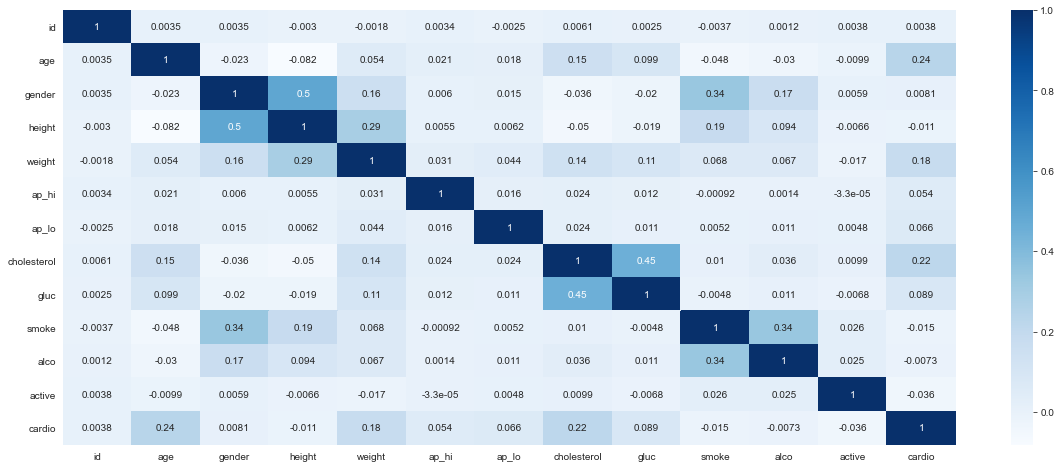

In [33]:
# Plot da matriz de correlação
plt.figure(figsize=(20,8))
sns.heatmap(cardio.corr(), annot=True, cmap = 'Blues');

* Principais correlações:

    gender/ smoke = 0.34

    height / weight = 0.29

    Cholesterol / cardio = 0.22

    gluc / cholesterol = 0.45

    smoke / alco = 0.34

    age / cardio = 0.24


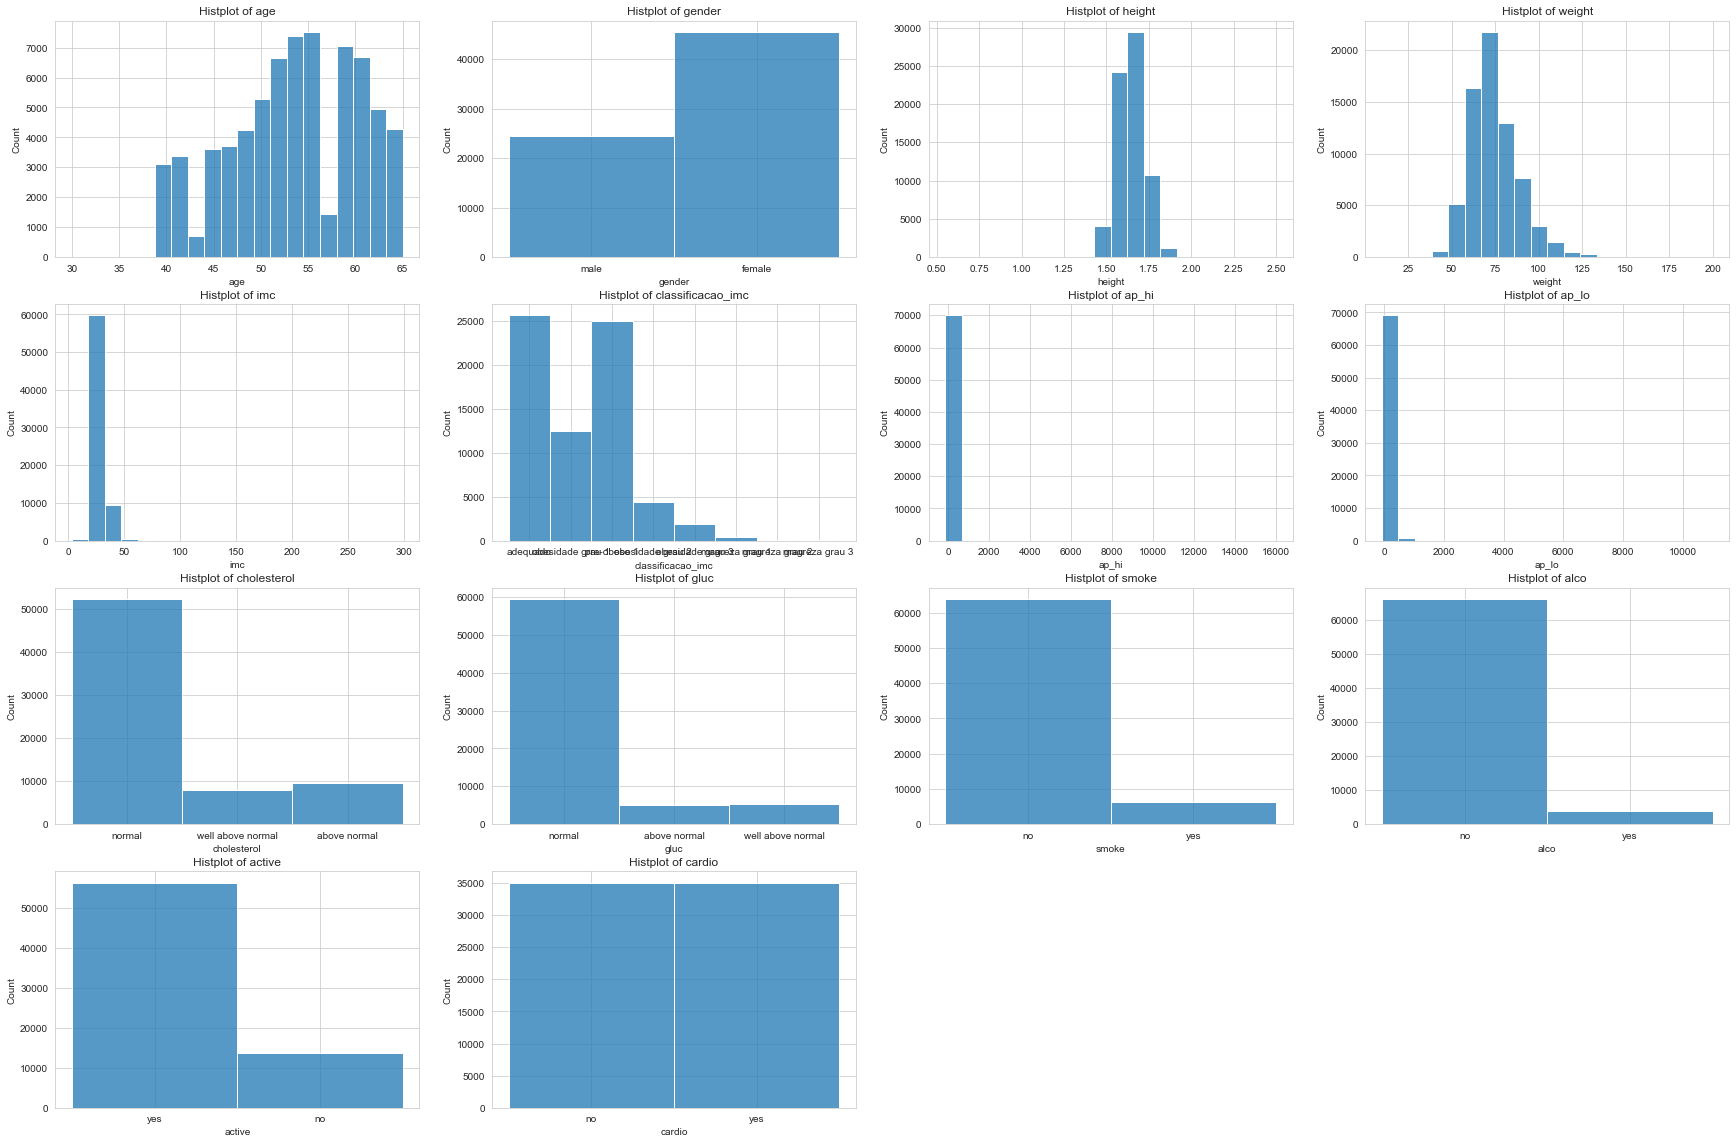

In [34]:
# Plots dos histogramas de todas as variáveis
plt.figure(1,figsize=(30,20))
n = 0

for a in cardio_eda:
    n+=1
    plt.subplot(4,4,n)
    sns.histplot(cardio_eda[a], bins = 20)
    plt.title('Histplot of {}'.format(a))
plt.show()

Text(0.5, 1.0, 'age')

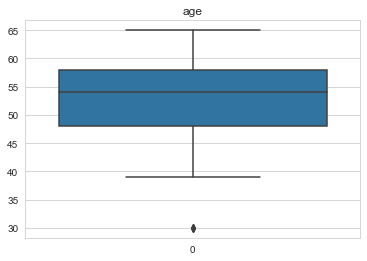

In [35]:
# Box plot da variável age
sns.boxplot(data = cardio_eda['age']);
plt.title('age')

plt.show()

* Visualização das variáveis categoricas

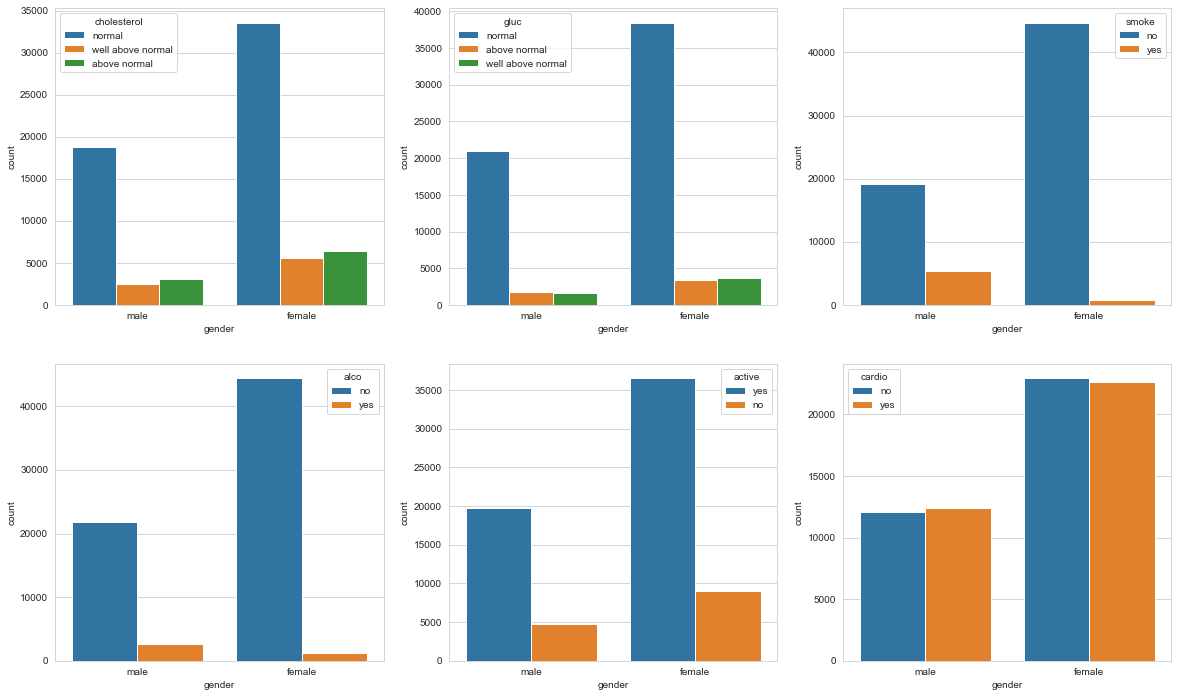

In [36]:
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.countplot(cardio_eda['gender'], hue = 'cholesterol', data = cardio_eda);

plt.subplot(2,3,2)
sns.countplot(cardio_eda['gender'], hue = 'gluc', data = cardio_eda);

plt.subplot(2,3,3)
sns.countplot(cardio_eda['gender'], hue = 'smoke', data = cardio_eda);


plt.subplot(2,3,4)
sns.countplot(cardio_eda['gender'], hue = 'alco', data = cardio_eda);

plt.subplot(2,3,5)
sns.countplot(cardio_eda['gender'], hue = 'active', data = cardio_eda);

plt.subplot(2,3,6)
sns.countplot(cardio_eda['gender'], hue = 'cardio', data = cardio_eda);

plt.show()

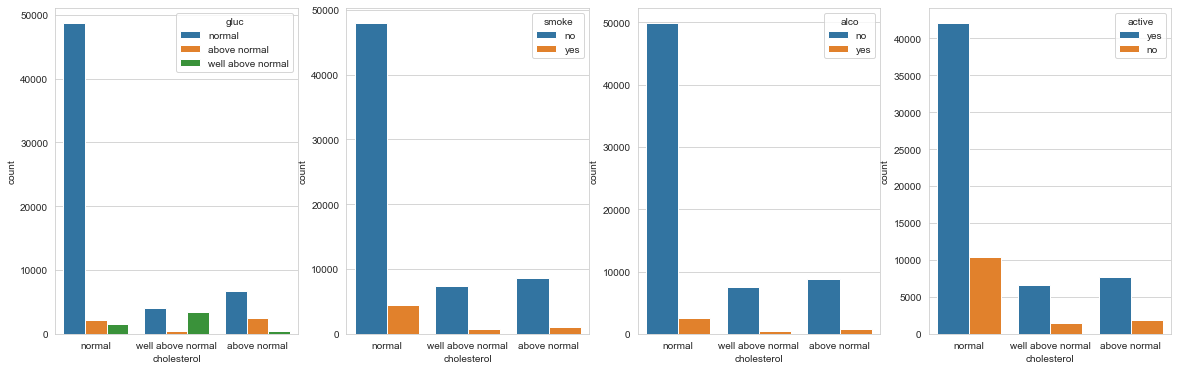

In [37]:
plt.figure(figsize=(20,6))

plt.subplot(1,4,1)
sns.countplot(cardio_eda['cholesterol'], hue = 'gluc', data = cardio_eda);

plt.subplot(1,4,2)
sns.countplot(cardio_eda['cholesterol'], hue = 'smoke', data = cardio_eda);

plt.subplot(1,4,3)
sns.countplot(cardio_eda['cholesterol'], hue = 'alco', data = cardio_eda);


plt.subplot(1,4,4)
sns.countplot(cardio_eda['cholesterol'], hue = 'active', data = cardio_eda);

plt.show()

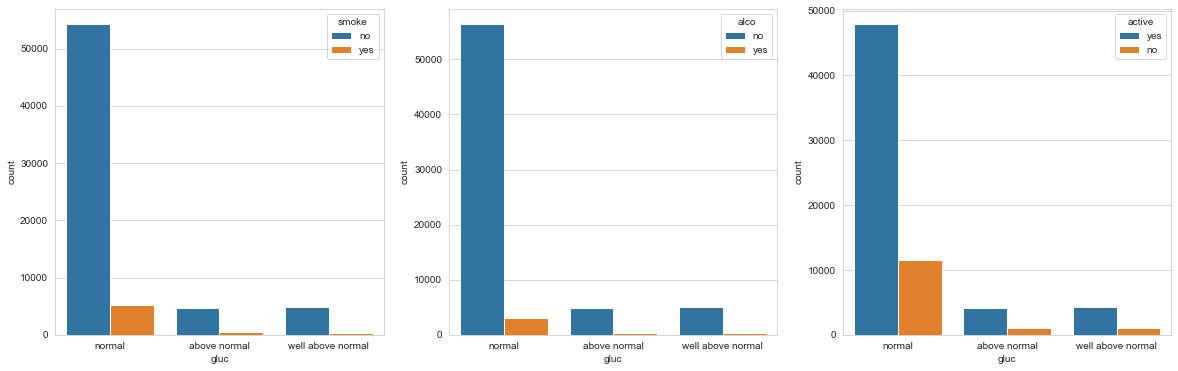

In [38]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.countplot(cardio_eda['gluc'], hue = 'smoke', data = cardio_eda);

plt.subplot(1,3,2)
sns.countplot(cardio_eda['gluc'], hue = 'alco', data = cardio_eda);

plt.subplot(1,3,3)
sns.countplot(cardio_eda['gluc'], hue = 'active', data = cardio_eda);

plt.show()

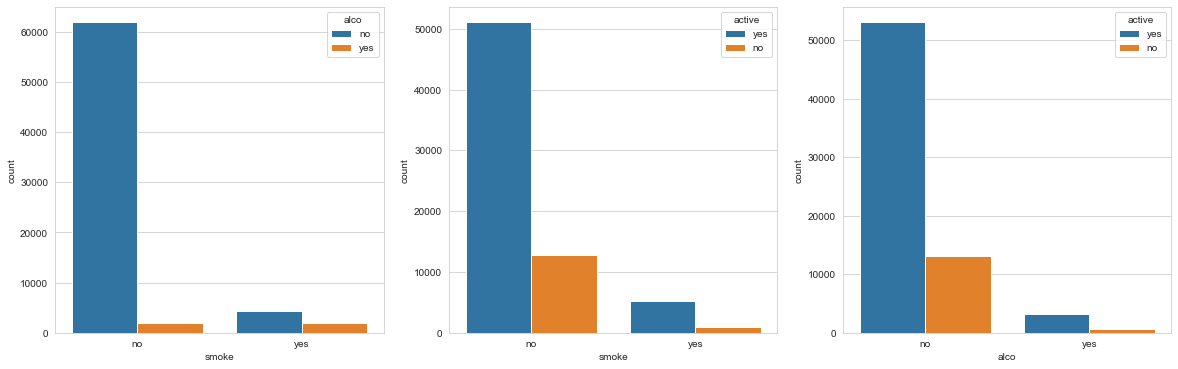

In [39]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.countplot(cardio_eda['smoke'], hue = 'alco', data = cardio_eda);

plt.subplot(1,3,2)
sns.countplot(cardio_eda['smoke'], hue = 'active', data = cardio_eda);

plt.subplot(1,3,3)
sns.countplot(cardio_eda['alco'], hue = 'active', data = cardio_eda);

plt.show()

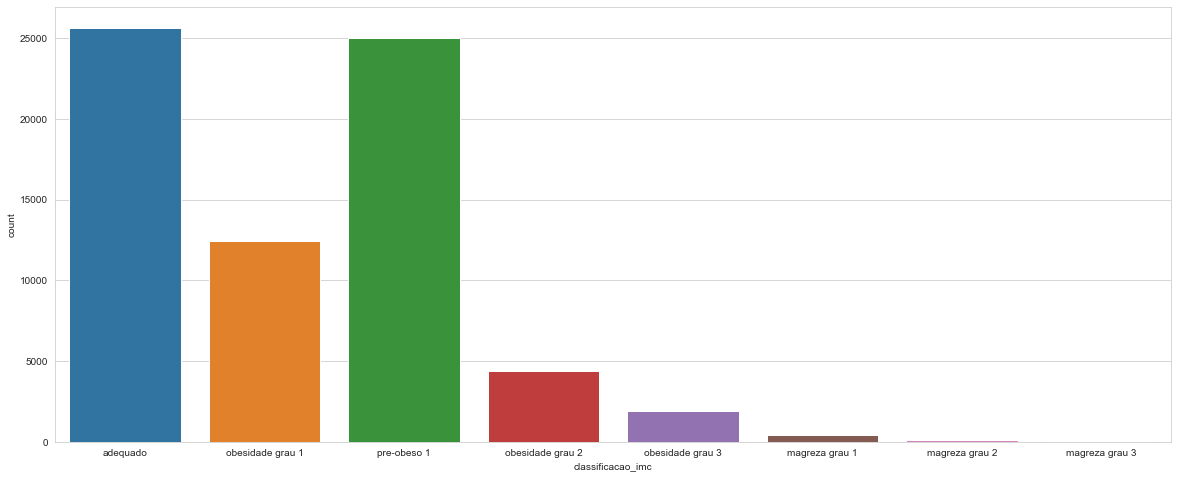

In [41]:
# Classificação do Imc
plt.figure(figsize=(20,8))
sns.countplot(cardio_eda['classificacao_imc']);

* Visualizações das variáveis categoticas com a variável age (idade)

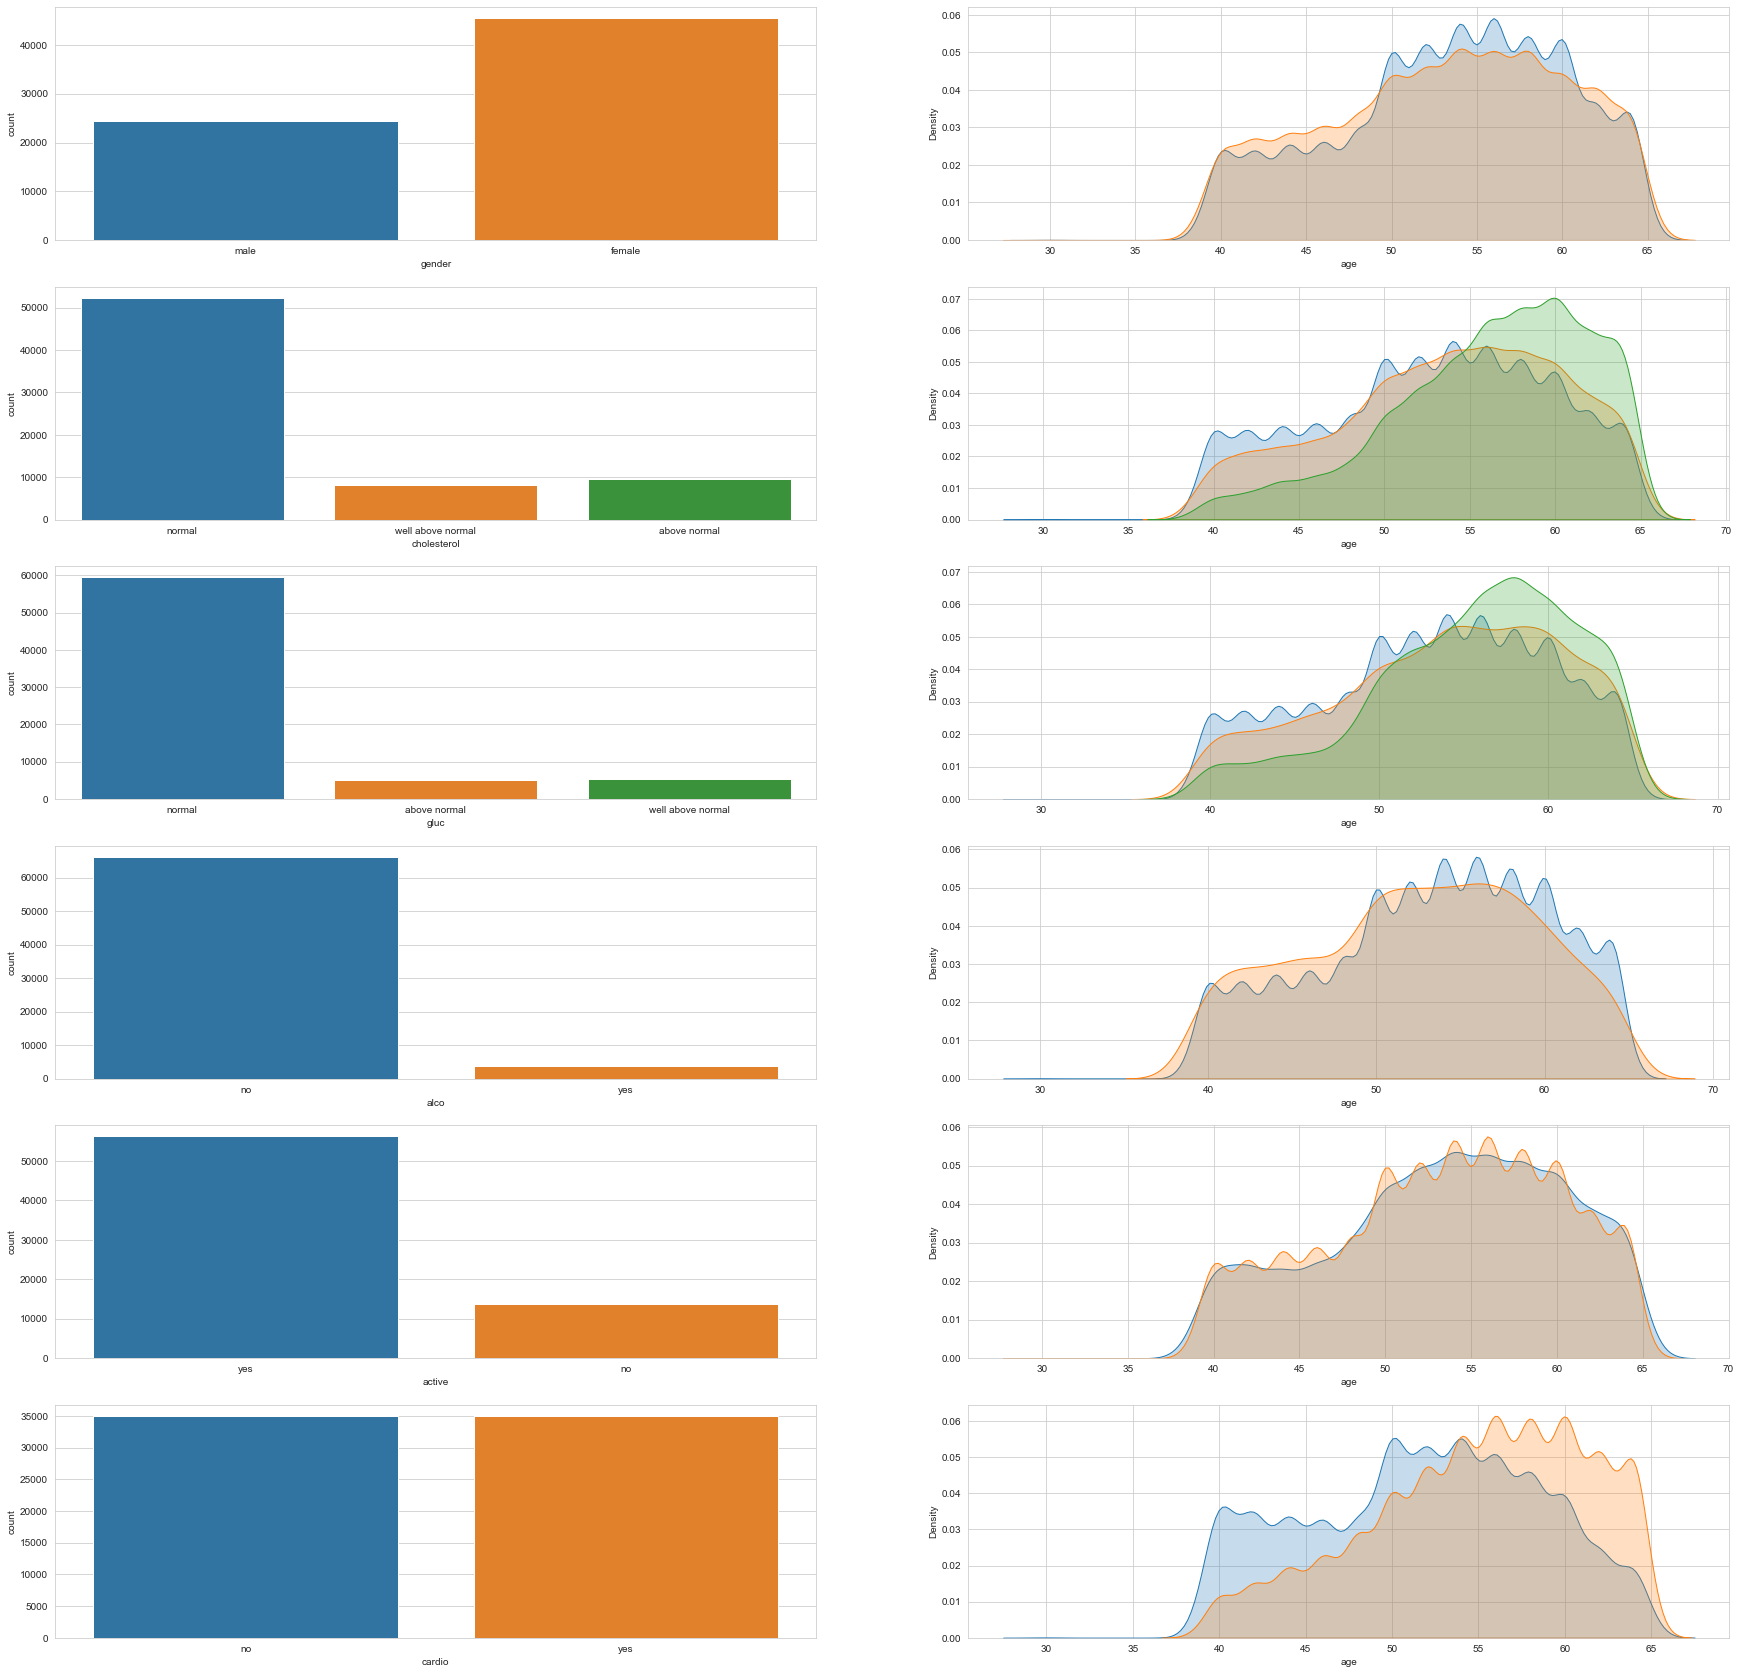

In [40]:
plt.figure(figsize=(30,30))

plt.subplot(6,2,1)
sns.countplot(cardio_eda['gender'])

plt.subplot(6,2,2)
sns.kdeplot(cardio_eda[cardio_eda['gender'] == 'female']['age'], label = 0, shade=True);
sns.kdeplot(cardio_eda[cardio_eda['gender'] == 'male']['age'], label = 0, shade=True);

plt.subplot(6,2,3)
sns.countplot(cardio_eda['cholesterol'])

plt.subplot(6,2,4)
sns.kdeplot(cardio_eda[cardio_eda['cholesterol'] == 'normal']['age'], label = 0, shade=True);
sns.kdeplot(cardio_eda[cardio_eda['cholesterol'] == 'above normal']['age'], label = 0, shade=True);
sns.kdeplot(cardio_eda[cardio_eda['cholesterol'] == 'well above normal']['age'], label = 0, shade=True);

plt.subplot(6,2,5)
sns.countplot(cardio_eda['gluc'])

plt.subplot(6,2,6)
sns.kdeplot(cardio_eda[cardio_eda['gluc'] == 'normal']['age'], label = 0, shade=True);
sns.kdeplot(cardio_eda[cardio_eda['gluc'] == 'above normal']['age'], label = 0, shade=True);
sns.kdeplot(cardio_eda[cardio_eda['gluc'] == 'well above normal']['age'], label = 0, shade=True);

plt.subplot(6,2,7)
sns.countplot(cardio_eda['alco'])

plt.subplot(6,2,8)
sns.kdeplot(cardio_eda[cardio_eda['alco'] == 'no']['age'], label = 0, shade=True);
sns.kdeplot(cardio_eda[cardio_eda['alco'] == 'yes']['age'], label = 0, shade=True);

plt.subplot(6,2,9)
sns.countplot(cardio_eda['active'])

plt.subplot(6,2,10)
sns.kdeplot(cardio_eda[cardio_eda['active'] == 'no']['age'], label = 0, shade=True);
sns.kdeplot(cardio_eda[cardio_eda['active'] == 'yes']['age'], label = 0, shade=True);

plt.subplot(6,2,11)
sns.countplot(cardio_eda['cardio'])

plt.subplot(6,2,12)
sns.kdeplot(cardio_eda[cardio_eda['cardio'] == 'no']['age'], label = 0, shade=True);
sns.kdeplot(cardio_eda[cardio_eda['cardio'] == 'yes']['age'], label = 0, shade=True);

plt.show()

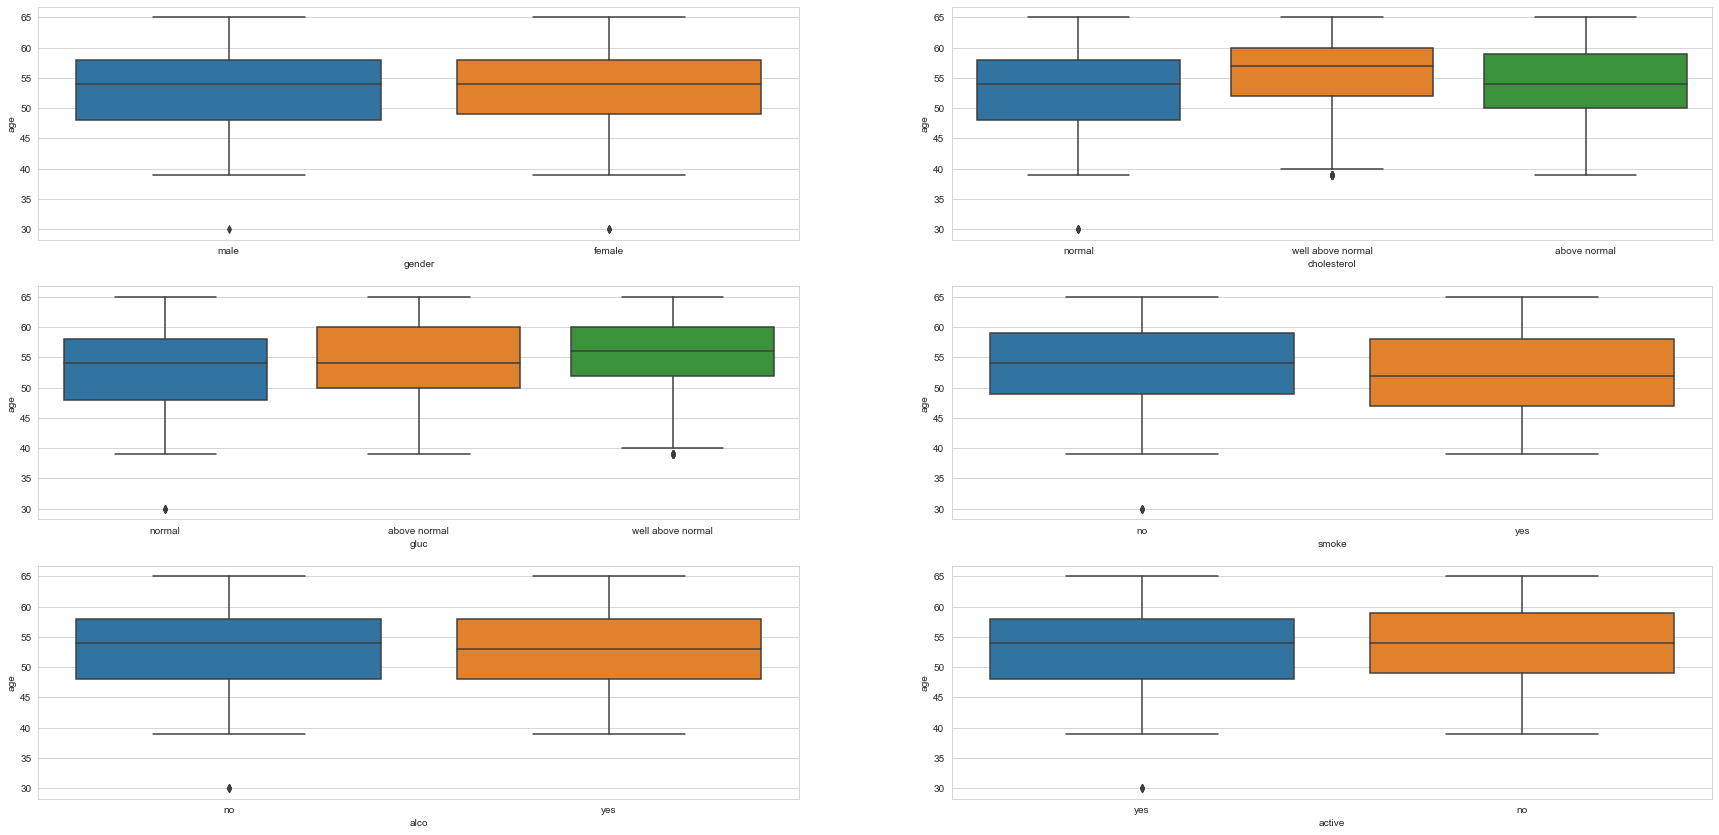

In [42]:
plt.figure(figsize=(30,30))

plt.subplot(6,2,1)
sns.boxplot(x = cardio_eda['gender'], y = cardio_eda['age'], data = cardio_eda)

plt.subplot(6,2,2)
sns.boxplot(x = cardio_eda['cholesterol'], y = cardio_eda['age'], data = cardio_eda)

plt.subplot(6,2,3)
sns.boxplot(x = cardio_eda['gluc'], y = cardio_eda['age'], data = cardio_eda)

plt.subplot(6,2,4)
sns.boxplot(x = cardio_eda['smoke'], y = cardio_eda['age'], data = cardio_eda)

plt.subplot(6,2,5)
sns.boxplot(x = cardio_eda['alco'], y = cardio_eda['age'], data = cardio_eda)

plt.subplot(6,2,6)
sns.boxplot(x = cardio_eda['active'], y = cardio_eda['age'], data = cardio_eda)

plt.show()

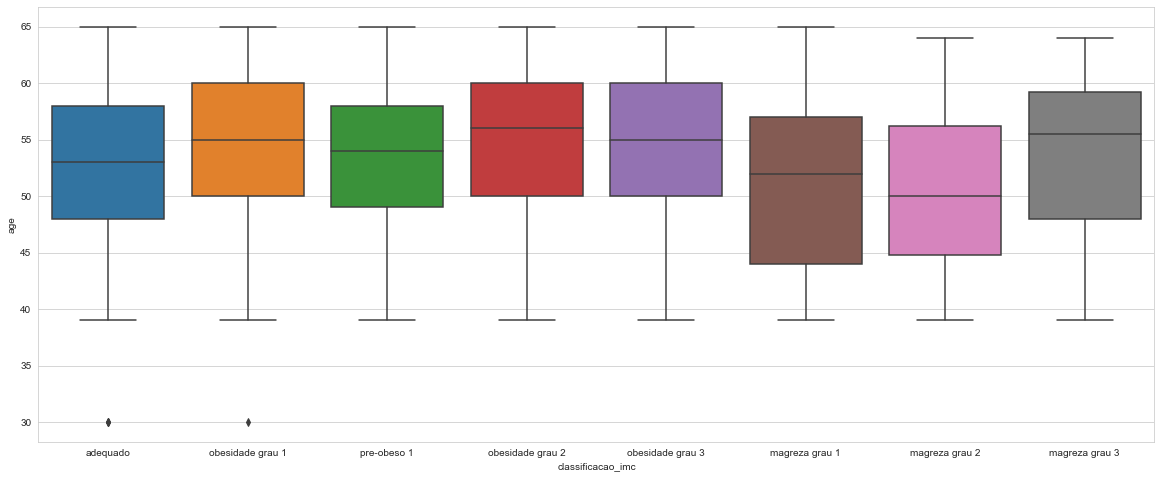

In [43]:
plt.figure(figsize=(20,8))
sns.boxplot(x = cardio_eda['classificacao_imc'], y = cardio_eda['age'], data = cardio_eda);

plt.show()

* Visualização das variáveis altura e peso com as demais variáveis categoricas

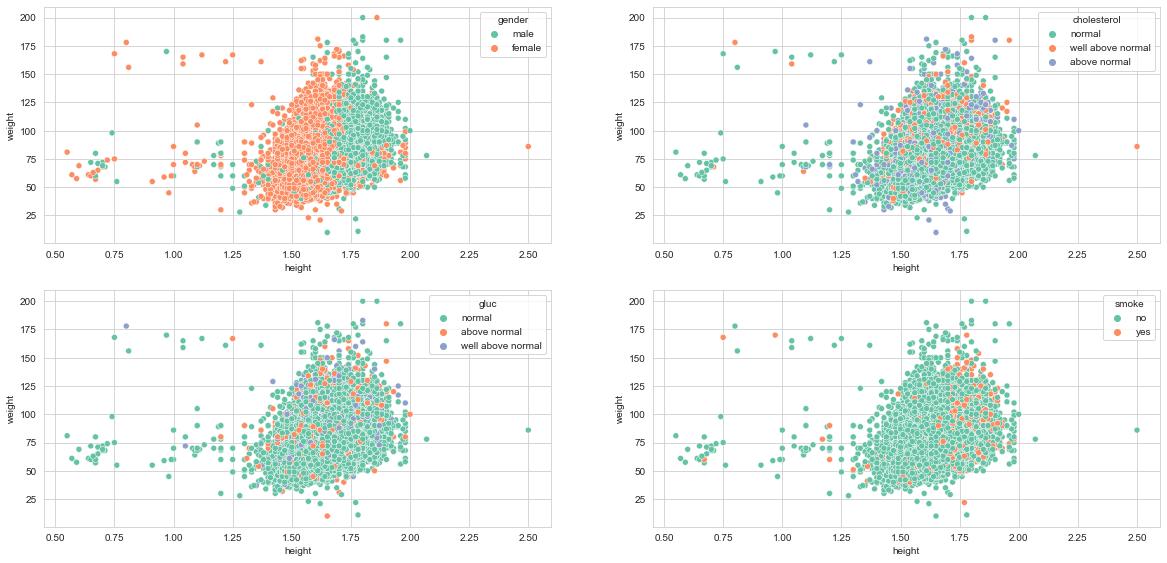

In [46]:
plt.figure(figsize = (20,20))

plt.subplot(4,2,1)
sns.scatterplot(x = cardio_eda['height'], y = cardio_eda['weight'], hue = 'gender', palette='Set2',data = cardio_eda);

plt.subplot(4,2,2)
sns.scatterplot(x = cardio_eda['height'], y = cardio_eda['weight'], hue = 'cholesterol',palette='Set2', data = cardio_eda);

plt.subplot(4,2,3)
sns.scatterplot(x = cardio_eda['height'], y = cardio_eda['weight'], hue = 'gluc',palette='Set2', data = cardio_eda);

plt.subplot(4,2,4)
sns.scatterplot(x = cardio_eda['height'], y = cardio_eda['weight'], hue = 'smoke',palette='Set2', data = cardio_eda);

plt.show()

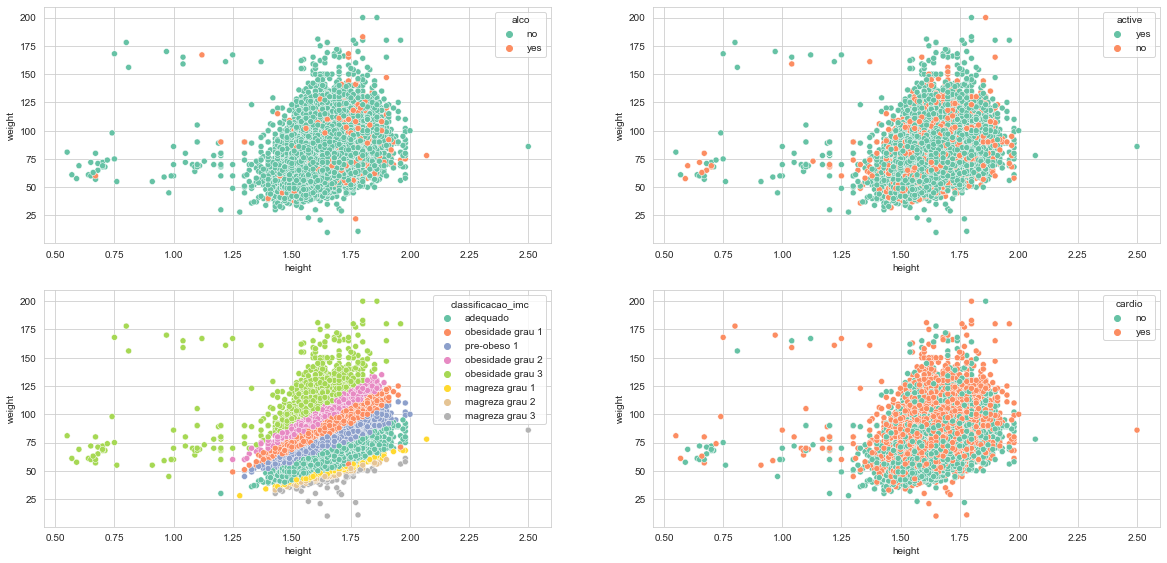

In [47]:
plt.figure(figsize=(20,20))


plt.subplot(4,2,1)
sns.scatterplot(x = cardio_eda['height'], y = cardio_eda['weight'], hue = 'alco',palette='Set2', data = cardio_eda);

plt.subplot(4,2,2)
sns.scatterplot(x = cardio_eda['height'], y = cardio_eda['weight'], hue = 'active',palette='Set2', data = cardio_eda);

plt.subplot(4,2,3)
sns.scatterplot(x = cardio_eda['height'], y = cardio_eda['weight'], hue = 'classificacao_imc',palette='Set2', data = cardio_eda);

plt.subplot(4,2,4)
sns.scatterplot(x = cardio_eda['height'], y = cardio_eda['weight'], hue = 'cardio',palette='Set2', data = cardio_eda);

plt.show()

# 4. Pré-Processamento KNN

In [8]:
# Separando os atributos da variável target
cardio_atrib = [c for c in cardio.columns if c not in ['id','classificacao_imc', 'imc', 'cardio']]
cardio_atrib_prev = ['cardio']

In [9]:
# Atribuindo os valores as variáveis x e y
x = cardio[cardio_atrib].values
y = cardio[cardio_atrib_prev].values

In [10]:
print(x)
print(y)

[[50.    2.    1.68 ...  0.    0.    1.  ]
 [55.    1.    1.56 ...  0.    0.    1.  ]
 [52.    1.    1.65 ...  0.    0.    0.  ]
 ...
 [52.    2.    1.83 ...  0.    1.    0.  ]
 [61.    1.    1.63 ...  0.    0.    0.  ]
 [56.    1.    1.7  ...  0.    0.    1.  ]]
[[0]
 [1]
 [1]
 ...
 [1]
 [1]
 [0]]


In [11]:
# Separando os dados de treino e teste / taxa de split de 0.30
x_treino, x_teste, y_treino, y_teste = sklearn.model_selection.train_test_split(x, y, test_size=0.30)

In [12]:
# Normalizando os dados pela média

# Calculo da média nos dados de treino
x_norm = np.mean(x_treino, axis = 0)

# Normalização dos dados de treino e teste
x_treino_norm = x_treino - x_norm
x_teste_norm = x_teste - x_norm  

# 4.1 KNeighborsClassifier KNN

In [14]:
# Criando o modelo
modelov1 = sklearn.neighbors.KNeighborsClassifier()

In [15]:
# Treinando o modelo
modelov1.fit(x_treino_norm, y_treino.ravel())

KNeighborsClassifier()

In [16]:
# Testtando o modelo
modelov1_predict = modelov1.predict(x_teste_norm)

In [17]:
# Criando a confusion matrix
print('Confusion Matrix')

print('{0}'.format(metrics.confusion_matrix(y_teste, modelov1_predict, labels = [1, 0])))
print("")

print('Classification Report')
print(metrics.classification_report(y_teste, modelov1_predict, labels = [1, 0]))

Confusion Matrix
[[7077 3497]
 [2976 7450]]

Classification Report
              precision    recall  f1-score   support

           1       0.70      0.67      0.69     10574
           0       0.68      0.71      0.70     10426

    accuracy                           0.69     21000
   macro avg       0.69      0.69      0.69     21000
weighted avg       0.69      0.69      0.69     21000



### 4.2 KNN Grid Search

In [18]:
# Criando o modelo
modelov2 = sklearn.neighbors.KNeighborsClassifier()

In [19]:
# Definindo os paramentros
k = np.arange(10) + 1
parametros = {'n_neighbors': k}

In [20]:
# Grid Search para Cross Validation com o melhor valor de K
modelo_KNN = sklearn.model_selection.GridSearchCV(modelov2, parametros, cv = 10)

In [21]:
# Visualizando os parâmetros 
modelo_KNN.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [22]:
# Treinando o modelo
modelo_KNN.fit(x_treino_norm, y_treino.ravel())

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [23]:
# Testando o modelo
modelov2_predict = modelo_KNN.predict(x_teste_norm)

In [24]:
# Criando a confusion matrix
print('Confusion Matrix')

print('{0}'.format(metrics.confusion_matrix(y_teste, modelov2_predict, labels = [1, 0])))
print("")

print('Classification Report')
print(metrics.classification_report(y_teste, modelov2_predict, labels = [1, 0]))

Confusion Matrix
[[7122 3452]
 [2759 7667]]

Classification Report
              precision    recall  f1-score   support

           1       0.72      0.67      0.70     10574
           0       0.69      0.74      0.71     10426

    accuracy                           0.70     21000
   macro avg       0.71      0.70      0.70     21000
weighted avg       0.71      0.70      0.70     21000



#### KNN accuracy: 0.70

# 5. Pre-Processamento Random Forest

In [62]:
# Separando os atributos da variável target
cardio_atrib = [c for c in cardio.columns if c not in ['id','imc', 'classificacao_imc', 'cardio']]
cardio_atrib_prev = ['cardio']

In [63]:
# Atribuindo os valores de x e y
X = cardio[cardio_atrib]
Y = cardio[cardio_atrib_prev]

In [64]:
x_vetor = cardio[cardio_atrib].values
y_vetor = cardio[cardio_atrib_prev].values

In [65]:
x_vetor

array([[1.8393e+04, 2.0000e+00, 1.6800e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0228e+04, 1.0000e+00, 1.5600e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.8857e+04, 1.0000e+00, 1.6500e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.9066e+04, 2.0000e+00, 1.8300e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.2431e+04, 1.0000e+00, 1.6300e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0540e+04, 1.0000e+00, 1.7000e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [66]:
X

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  19240       2     168    76.0    120     80            1     1      1   
69996  22601       1     158   126.0    140     90            2     2      0   
69997  19066       2     183   105.0    180     90            3     1      0   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  
0         0       1  
1         0       1  
2         0       0  
3         0       1  
4         0       0  
...     ...     ...  
69995     0       1  
69996     0       1  
69997     1       0  
69998     0       0  
69999     0       1  

[70000 rows x 11 columns]

In [67]:
# Separando os dados de treino e teste / taxa de split de 0.30
X_treino, X_teste, Y_treino, Y_teste = sklearn.model_selection.train_test_split(X, Y, test_size=0.30)

In [68]:
# Separando os dados de treino e teste / taxa de split de 0.30
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_vetor, y_vetor, test_size=0.30)

# 5.1 Random Forest Classifier

In [69]:
# Criando o modelo 
modelo_rfc = RandomForestClassifier()

In [70]:
# Treinando o modelo
modelo_rfc.fit(X_treino, Y_treino)

<ipython-input-70-ee28c50e0bd5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_rfc.fit(X_treino, Y_treino)


RandomForestClassifier()

In [71]:
# Avaliação do modelo com os dados de teste
rfc_predict = modelo_rfc.predict(X_teste)

In [72]:
# Verificando a acuracia do modelo
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rfc_predict)))
print()

Exatidão (Accuracy): 0.7134



In [73]:
# Resultados do modelo: Confusion Matrix e Classification Report
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, rfc_predict, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, rfc_predict, labels = [1, 0]))

Confusion Matrix
[[7330 3143]
 [2876 7651]]

Classification Report
              precision    recall  f1-score   support

           1       0.72      0.70      0.71     10473
           0       0.71      0.73      0.72     10527

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000



In [74]:
# Criando o modelo 
modelo_clf = RandomForestClassifier()

In [75]:
# Treinando o modelo com dados vetorizados
modelo_clf.fit(x_train, y_train.ravel())

RandomForestClassifier()

In [76]:
# Predição
clf_predict = modelo_clf.predict(x_test)

In [77]:
# Verificando a acuracia do modelo
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_test, clf_predict)))
print()

Exatidão (Accuracy): 0.7080



In [78]:
# Resultados do modelo: Confusion Matrix e Classification Report
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_test, clf_predict, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, clf_predict, labels = [1, 0]))

Confusion Matrix
[[7327 3266]
 [2865 7542]]

Classification Report
              precision    recall  f1-score   support

           1       0.72      0.69      0.71     10593
           0       0.70      0.72      0.71     10407

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000



In [79]:
import plotly.express as px
def impPlot(imp, name):
    figure = px.bar(imp,
                    x=imp.values,
                    y=imp.keys(), labels = {'x':'Importance Value', 'index':'Columns'},
                    text=np.round(imp.values, 2),
                    title=name + ' Feature Selection Plot',
                    width=900, height=600)
    figure.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
    })
    st.plotly_chart(figure)

In [80]:
feat_importances = pd.Series(modelo_rfc.feature_importances_, index=X.columns).sort_values(ascending=False)

In [81]:
px.bar(feat_importances, barmode='stack', title='Feature Importance')

* *Receiver Operating Characteristic Curve* - CURVA ROC

In [86]:
from sklearn.metrics import roc_curve

In [82]:
rf_prob = modelo_clf.predict_proba(X_teste)

In [84]:
probs = rf_prob[:,1]

In [87]:
rfp, rvp, lim = roc_curve(Y_teste, probs)

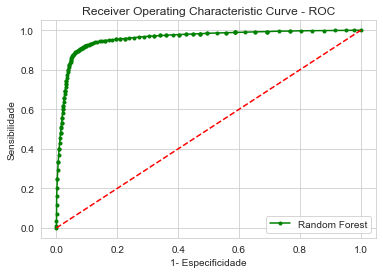

In [91]:
# Gráfico da curva roc
plt.plot(rfp, rvp, marker='.', label='Random Forest',color="green")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
plt.legend()
plt.title('Receiver Operating Characteristic Curve - ROC')

plt.show()

#### Random Forest accuracy = 0.71

### Aplicando o modelo Random Forest com redução no conjuto de dados para criação do app no streamlit

In [171]:
cardio_reduce = cardio.drop(cardio.index[500:], axis = 0)

In [172]:
cardio_reduce

age  gender  height  weight        imc classificacao_imc  ap_hi  ap_lo  \
0    50.0       2    1.68    62.0  21.967120          adequado    110     80   
1    55.0       1    1.56    85.0  34.927679  obesidade grau 1    140     90   
2    52.0       1    1.65    64.0  23.507805          adequado    130     70   
3    48.0       2    1.69    82.0  28.710479       pre-obeso 1    150    100   
4    48.0       1    1.56    56.0  23.011177          adequado    100     60   
..    ...     ...     ...     ...        ...               ...    ...    ...   
495  60.0       1    1.50    88.0  39.111111  obesidade grau 2    120     80   
496  48.0       1    1.51   117.0  51.313539  obesidade grau 3    160     90   
497  56.0       1    1.51    53.0  23.244595          adequado    120     80   
498  58.0       1    1.62    60.0  22.862369          adequado    120     80   
499  60.0       1    1.68    65.0  23.030045          adequado    158     91   

     cholesterol  gluc  smoke  alco  active  cardio  
0              1     1      0     0       1       0  
1              3     1      0     0       1       1  
2              3     1      0     0       0       1  
3              1     1      0     0       1       1  
4              1     1      0     0       0       0  
..           ...   ...    ...   ...     ...     ...  
495            1     1      0     0       1       0  
496            2     1      0     0       0       1  
497            1     1      0     0       1       0  
498            1     1      0     0       0       0  
499            1     1      0     0       1       1  

[500 rows x 14 columns]

In [137]:
# Verificando a ocorrencia de casos positivos e negativos
cardio_true = len(cardio_reduce.loc[cardio['cardio'] == 1])
cardio_false = len(cardio_reduce.loc[cardio['cardio'] == 0])

print('Número de casos positivos: {0} ({1:2.2f}%)'.format
      (cardio_true, (cardio_true / (cardio_true + cardio_false)) * 100))

print('Número de casos negativos: {0} ({1:2.2f}%)'.format
      (cardio_false, (cardio_false / (cardio_false + cardio_true)) * 100))

Número de casos positivos: 263 (52.60%)
Número de casos negativos: 237 (47.40%)


In [138]:
# Separando os atributos da variável target
cardio_atrib = [c for c in cardio_reduce.columns if c not in ['id','imc', 'classificacao_imc', 'cardio']]
cardio_atrib_prev = ['cardio']

In [173]:
# Atribuindo os valores de x e y
x_2= cardio_reduce[cardio_atrib].values
y_2 = cardio_reduce[cardio_atrib_prev].values

In [174]:
x_2

array([[50.  ,  2.  ,  1.68, ...,  0.  ,  0.  ,  1.  ],
       [55.  ,  1.  ,  1.56, ...,  0.  ,  0.  ,  1.  ],
       [52.  ,  1.  ,  1.65, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [56.  ,  1.  ,  1.51, ...,  0.  ,  0.  ,  1.  ],
       [58.  ,  1.  ,  1.62, ...,  0.  ,  0.  ,  0.  ],
       [60.  ,  1.  ,  1.68, ...,  0.  ,  0.  ,  1.  ]])

In [175]:
# Separando os dados de treino e teste / taxa de split de 0.30
x_treino2, x_teste2, y_treino2, y_teste2 = sklearn.model_selection.train_test_split(x_2, y_2, test_size=0.30)

In [176]:
# Criando o modelo 
clf_reduce = RandomForestClassifier()

In [177]:
clf_reduce.fit(x_treino2, y_treino2.ravel())

RandomForestClassifier()

In [178]:
predict = clf_reduce.predict(x_teste2)

In [179]:
# Resultados do modelo: Confusion Matrix e Classification Report
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_teste2, predict, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_teste2, predict, labels = [1, 0]))

Confusion Matrix
[[51 23]
 [20 56]]

Classification Report
              precision    recall  f1-score   support

           1       0.72      0.69      0.70        74
           0       0.71      0.74      0.72        76

    accuracy                           0.71       150
   macro avg       0.71      0.71      0.71       150
weighted avg       0.71      0.71      0.71       150



####  Random Forest Accuracy: 0.71

# 6. Salvando o modelo

In [45]:
import pickle

In [51]:
pickle.dump(modelo_clf, open('model_clf.pkl', 'wb'))

***No app do Streamlit será utilizado o modelo Random Forest, tive que diminuir o dataset pelo motivo do deploy no Heroku. Modelo com o dataset completo passou dos 100mb e comprometeu o desempenho, como estou utilizando a conta gratuita, ultrapassa o limite de mémoria oferecido pelo Heroku.***